In [11]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
covid = pd.read_csv('worldwide_covid19.csv')
covid

,date,patient,country_id
0,2020-01-22,0,0
1,2020-01-23,0,0
2,2020-01-24,1,0
3,2020-01-25,0,0
4,2020-01-26,3,0
...,...,...,...
44134,2020-09-08,0,187
44135,2020-09-09,0,187
44136,2020-09-10,0,187
44137,2020-09-11,0,187


In [3]:
year = covid['date'].apply(lambda x: str(x)[:4])
month = covid['date'].apply(lambda x: str(x)[5:7])
date = covid['date'].apply(lambda x: str(x)[8:])
mydate = year+month+date

In [4]:
covid['mydate'] = mydate

In [5]:
covid['mydate'] = covid['mydate'].astype('int64')

In [6]:
date_table = pd.read_csv('date_table.csv')
date_table_2020 = date_table[date_table['year']==2020]
date_table_2020

,STD_DD,year,month,day,week_num,day_of_week,day_of_week_kr
120,20200201,2020,2,1,4,5,토
121,20200202,2020,2,2,5,6,일
122,20200203,2020,2,3,5,0,월
123,20200204,2020,2,4,5,1,화
124,20200205,2020,2,5,5,2,수
...,...,...,...,...,...,...,...
236,20200527,2020,5,27,21,2,수
237,20200528,2020,5,28,21,3,목
238,20200529,2020,5,29,21,4,금
239,20200530,2020,5,30,21,5,토


In [7]:
covid = covid.merge(date_table, how = 'inner' ,left_on = 'mydate', right_on = 'STD_DD')

In [8]:
covid.drop('mydate', axis=1, inplace=True)

In [9]:
covid = covid[covid['country_id']==76]
covid['patient'] = covid['patient'].astype('int64')
covid

,date,patient,country_id,STD_DD,year,month,day,week_num,day_of_week,day_of_week_kr
76,2020-02-01,1,76,20200201,2020,2,1,4,5,토
264,2020-02-02,3,76,20200202,2020,2,2,5,6,일
452,2020-02-03,0,76,20200203,2020,2,3,5,0,월
640,2020-02-04,1,76,20200204,2020,2,4,5,1,화
828,2020-02-05,3,76,20200205,2020,2,5,5,2,수
...,...,...,...,...,...,...,...,...,...,...
21860,2020-05-27,79,76,20200527,2020,5,27,21,2,수
22048,2020-05-28,58,76,20200528,2020,5,28,21,3,목
22236,2020-05-29,39,76,20200529,2020,5,29,21,4,금
22424,2020-05-30,27,76,20200530,2020,5,30,21,5,토


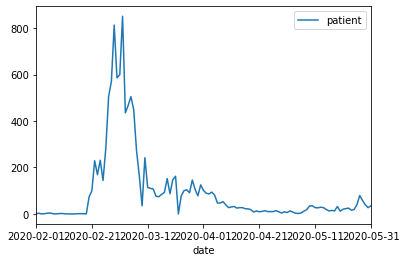

In [25]:
pd.DataFrame(covid.groupby('date')['patient'].sum()).plot(kind='line')

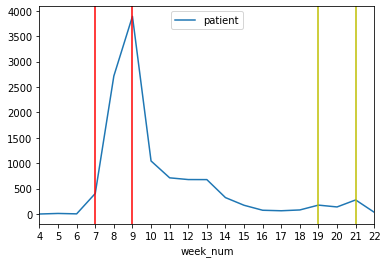

In [24]:
pd.DataFrame(covid.groupby('week_num')['patient'].sum()).plot(kind='line')
plt.xticks(range(4,23))
plt.axvline(7, color='r')
plt.axvline(9, color='r')
plt.axvline(19, color='y')
plt.axvline(21, color='y')

In [14]:
import requests
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import os
import webbrowser
import folium
from folium import plugins
print(folium.__version__)

0.11.0


In [28]:
# Initialize the map:
m = folium.Map(location=[36, 127], tiles="OpenStreetMap", zoom_start=7)

m.choropleth(
    geo_data=geo_data,
    name='인구수',
    data=state_data,
    columns=['CODE', 'POPULATION'],
    key_on='features.properties.SIG_CD',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name = 'Population'
)

folium.LayerControl().add_to(m)

# Save to html
m.save('folium_kr.html')
webbrowser.open_new("folium_kr.html")

NameError: name 'geo_data' is not defined